### Note!: 
Graphviz and pydotplus must be installed to view decision tree in step 2.


To install, run this code by removing hashtags:

In [89]:
#!pip install graphviz
#!pip install pydotplus

# Decision Trees:
Use decision trees and random forest to train the titanic.csv dataset included in the assignment

## 1.)
Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. 

In [176]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO   
from IPython.display import Image  
import pydotplus

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [178]:
import pandas as pd
import numpy as np

#Reading in Data
df = pd.read_csv('Titanic.csv')
df

Unnamed: 0 pclass  survived                             name     sex  \
0              1    1st         1    Allen, Miss. Elisabeth Walton  female   
1              2    1st         1   Allison, Master. Hudson Trevor    male   
2              3    1st         0     Allison, Miss. Helen Loraine  female   
3              4    1st         0  Allison, Mr. Hudson Joshua Crei    male   
4              5    1st         0  Allison, Mrs. Hudson J C (Bessi  female   
...          ...    ...       ...                              ...     ...   
1304        1305    3rd         0             Zabour, Miss. Hileni  female   
1305        1306    3rd         0            Zabour, Miss. Thamine  female   
1306        1307    3rd         0        Zakarian, Mr. Mapriededer    male   
1307        1308    3rd         0              Zakarian, Mr. Ortin    male   
1308        1309    3rd         0               Zimmerman, Mr. Leo    male   

          age  sibsp  parch  ticket        fare    cabin     embarked boat  \
0     29.0000      0      0   24160  211.337494       B5  Southampton    2   
1      0.9167      1      2  113781  151.550003  C22 C26  Southampton   11   
2      2.0000      1      2  113781  151.550003  C22 C26  Southampton  NaN   
3     30.0000      1      2  113781  151.550003  C22 C26  Southampton  NaN   
4     25.0000      1      2  113781  151.550003  C22 C26  Southampton  NaN   
...       ...    ...    ...     ...         ...      ...          ...  ...   
1304  14.5000      1      0    2665   14.454200      NaN    Cherbourg  NaN   
1305      NaN      1      0    2665   14.454200      NaN    Cherbourg  NaN   
1306  26.5000      0      0    2656    7.225000      NaN    Cherbourg  NaN   
1307  27.0000      0      0    2670    7.225000      NaN    Cherbourg  NaN   
1308  29.0000      0      0  315082    7.875000      NaN  Southampton  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1304  328.0                              NaN  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  

[1309 rows x 15 columns]

In [179]:
#Fill Data with averages using fillna
#Used numeric_only=True to only apply code to columns/rows with numerical values
df.fillna(value=df.mean(numeric_only=True))

Unnamed: 0 pclass  survived                             name     sex  \
0              1    1st         1    Allen, Miss. Elisabeth Walton  female   
1              2    1st         1   Allison, Master. Hudson Trevor    male   
2              3    1st         0     Allison, Miss. Helen Loraine  female   
3              4    1st         0  Allison, Mr. Hudson Joshua Crei    male   
4              5    1st         0  Allison, Mrs. Hudson J C (Bessi  female   
...          ...    ...       ...                              ...     ...   
1304        1305    3rd         0             Zabour, Miss. Hileni  female   
1305        1306    3rd         0            Zabour, Miss. Thamine  female   
1306        1307    3rd         0        Zakarian, Mr. Mapriededer    male   
1307        1308    3rd         0              Zakarian, Mr. Ortin    male   
1308        1309    3rd         0               Zimmerman, Mr. Leo    male   

            age  sibsp  parch  ticket        fare    cabin     embarked boat  \
0     29.000000      0      0   24160  211.337494       B5  Southampton    2   
1      0.916700      1      2  113781  151.550003  C22 C26  Southampton   11   
2      2.000000      1      2  113781  151.550003  C22 C26  Southampton  NaN   
3     30.000000      1      2  113781  151.550003  C22 C26  Southampton  NaN   
4     25.000000      1      2  113781  151.550003  C22 C26  Southampton  NaN   
...         ...    ...    ...     ...         ...      ...          ...  ...   
1304  14.500000      1      0    2665   14.454200      NaN    Cherbourg  NaN   
1305  29.881135      1      0    2665   14.454200      NaN    Cherbourg  NaN   
1306  26.500000      0      0    2656    7.225000      NaN    Cherbourg  NaN   
1307  27.000000      0      0    2670    7.225000      NaN    Cherbourg  NaN   
1308  29.000000      0      0  315082    7.875000      NaN  Southampton  NaN   

            body                        home.dest  
0     160.809917                     St Louis, MO  
1     160.809917  Montreal, PQ / Chesterville, ON  
2     160.809917  Montreal, PQ / Chesterville, ON  
3     135.000000  Montreal, PQ / Chesterville, ON  
4     160.809917  Montreal, PQ / Chesterville, ON  
...          ...                              ...  
1304  328.000000                              NaN  
1305  160.809917                              NaN  
1306  304.000000                              NaN  
1307  160.809917                              NaN  
1308  160.809917                              NaN  

[1309 rows x 15 columns]

## 2.)

Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. You may see a tree similar to this one (the actual structure and size of your tree can be different): 


In [180]:
# independent variables ‘pclass + sex + age + sibsp’
# dependent variable ‘survived’
# ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no)

In [181]:
features = ['pclass', 'sex', 'age', 'sibsp']
X = df[features].apply(LabelEncoder().fit_transform) 
y = df['survived']

print(X)
print(y) 

      pclass  sex  age  sibsp
0          0    0   44      0
1          0    1    6      1
2          0    0    8      1
3          0    1   45      1
4          0    0   38      1
...      ...  ...  ...    ...
1304       2    0   22      1
1305       2    0   98      1
1306       2    1   40      0
1307       2    1   41      0
1308       2    1   44      0

[1309 rows x 4 columns]
0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64


Take a random 80% samples for training and the rest 20% for test.

random_state=42 is used to keep the same split data throughout every run of the code. If not used, then the data split will choose different random sett each time the code is ran, giving different results.  

In [182]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [183]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [184]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7519083969465649


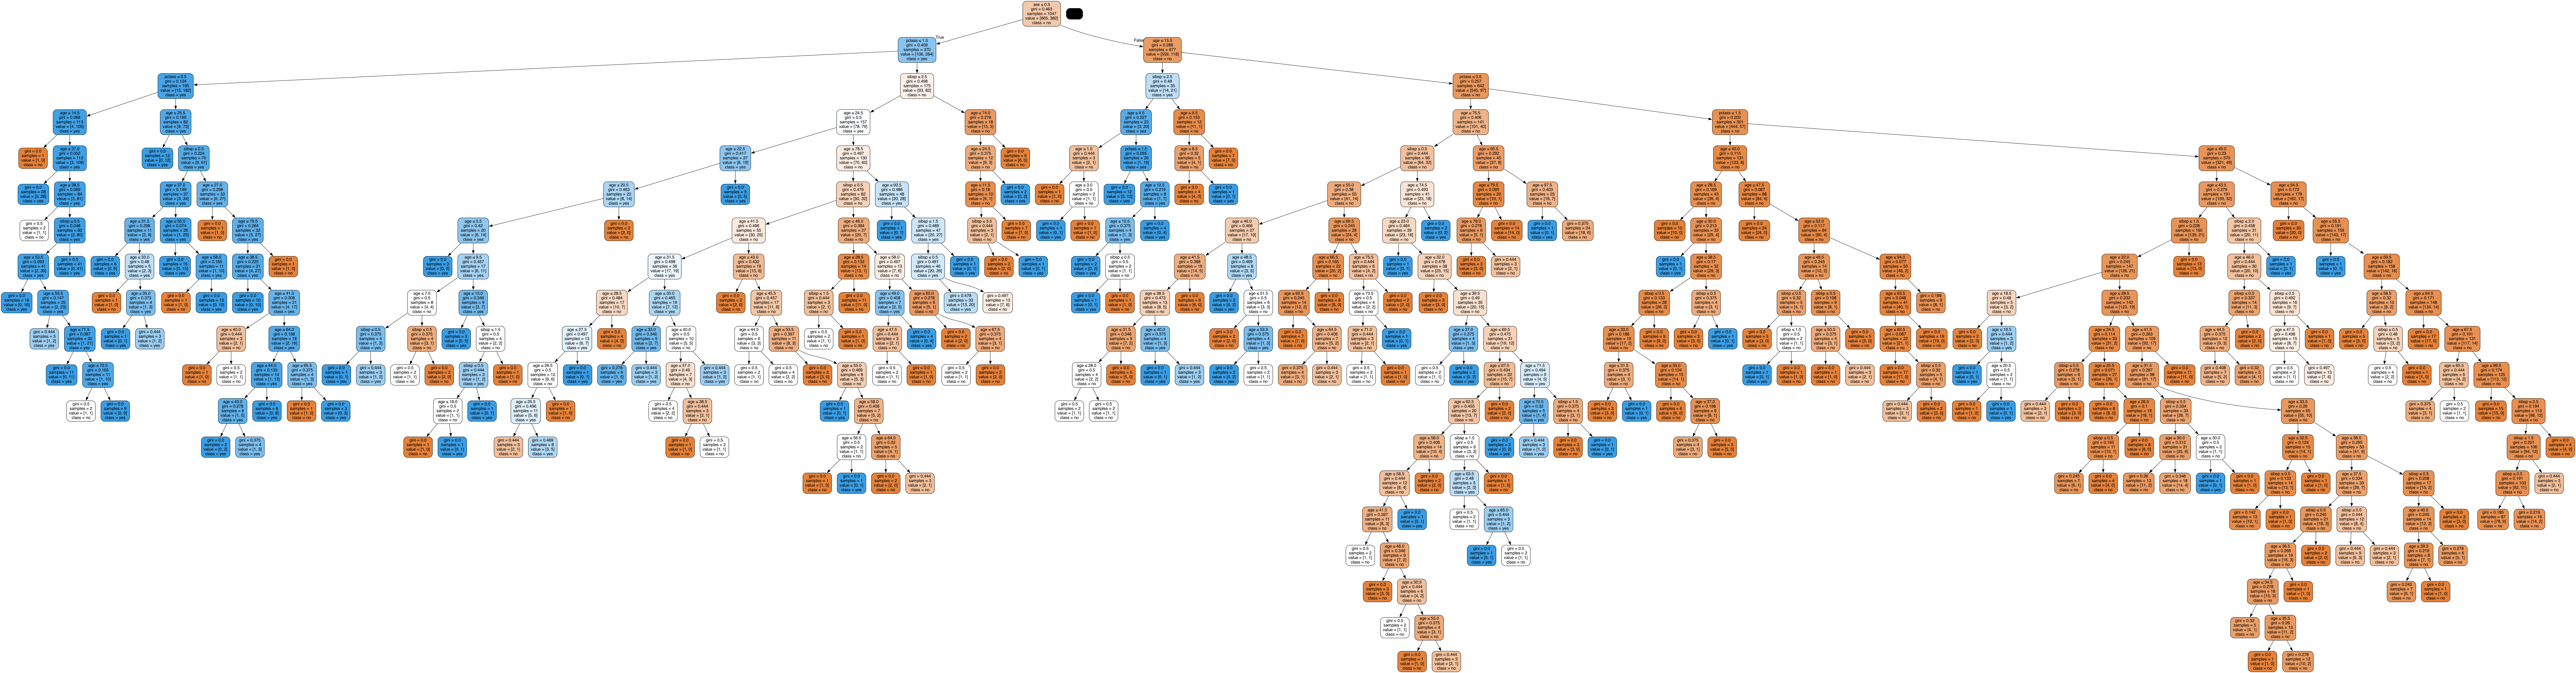

In [185]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('TitanicTree.png')
Image(graph.create_png())

## 3.) 
Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.

In [186]:
import warnings
warnings.filterwarnings('ignore')

In [188]:
rfc = RandomForestClassifier()
forest_params = [{'max_depth': list(range(1,7)), 'max_features':list(range(1,7))}]
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 5, 'max_features': 4}
0.8213369963369963


Max depth = max leaf nodes

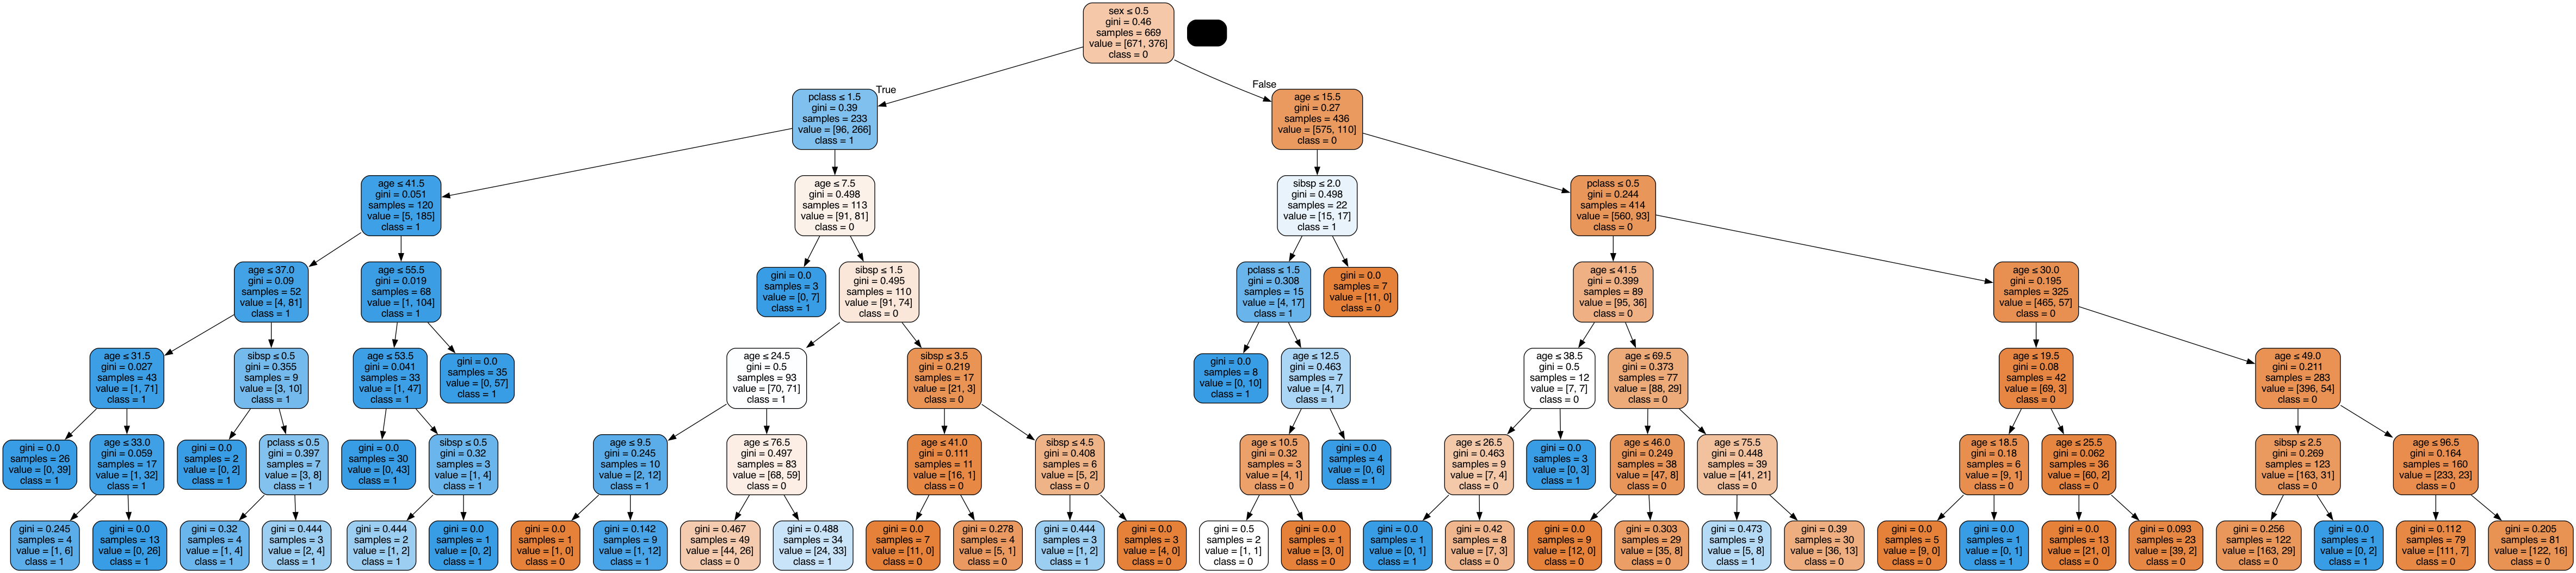

In [172]:
dot_data = StringIO()
export_graphviz(clf.best_estimator_.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('PrunedTree.png')
Image(graph.create_png())


## 4.)
Step 4: For the pruned tree, report its accuracy on the test set for the following: 
 
percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set) 

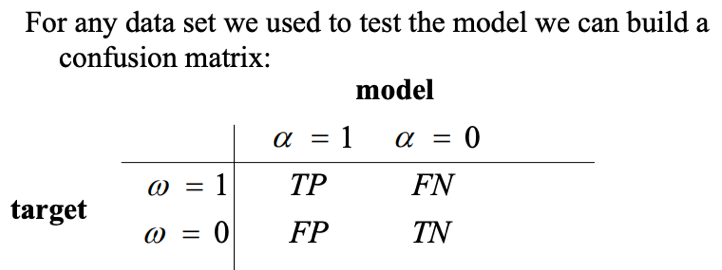

Where;  
TP = True Positive, FN = False Negative  
FP = False Positive, TN = True Negative

In [190]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rfc, X_test, y_test, cv=3)
confusion_matrix(y_test, predictions)

array([[101,  43],
       [ 33,  85]])

101 passengers were correctly classfied as did not survive
43 passengers were wrongly classified as did not survive

33 passengers were wrongly classified as survived
85 passengers were correctly classified as survived

In [191]:
#Precision and Recall

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))

Precision: 0.6640625
Recall: 0.7203389830508474


66% accuracy for passenger survival prediction  
Our model predicted the surival to be 72% of the passengers

## 5.)

Step 5: Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50.  Report the accuracy of random forest on the test set for the following:  
 
percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set) 
 
Check whether there is improvement as compared to a single tree obtained in Step 4. 
 

In [202]:
# Random Forest

new_rfc = RandomForestClassifier(n_estimators=50, max_depth=5)
new_rfc.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_rfc = round(new_rfc.score(X_train, y_train) * 50, 2)
print(round(acc_rfc,2,), "%")

41.55 %


In [205]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(new_rfc, X_test, y_test, cv=3)
confusion_matrix(y_test, predictions)

array([[116,  28],
       [ 30,  88]])

116 passengers were correctly classfied as did not survive  
28 passengers were wrongly classified as did not survive

30 passengers were wrongly classified as survived  
88 passengers were correctly classified as survived

In [206]:
#Precision and Recall

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))

Precision: 0.7586206896551724
Recall: 0.7457627118644068
